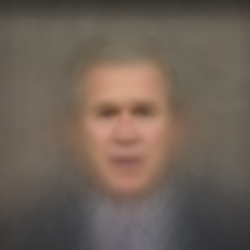

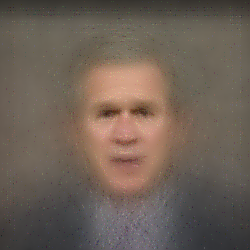

In [ ]:
from PIL import Image
from PIL import ImageEnhance
import numpy as np
import os
from IPython.display import display

image_dir = "/content/Photos" # הגדרת נתיב לתיקיית התמונות

image_files = [                                       # קבלת רשימת כל קבצי התמונות בתיקייה
              os.path.join(image_dir, f)              # משמשת לחיבור מספר חלקי נתיב לכדי נתיב אחד שלם ,כלומר פונקציה זו יוצרת נתיב אחד שלם בעבור כול התמונות הנמצאות בתיקייהos.path.join(image_dir, f) הפונקציה
              for f in os.listdir(image_dir)          # image_dir מחזירה רשימה של שמות כל הקבצים והספריות שנמצאים בתיקיית  os.listdir(image_dir) למעשה ,os.listdir(image_dir) מייצג כל פריט (קובץ או תיקייה) שנמצאת ברשימה שמחזירה הפונקציה f
                if f.endswith(('png', 'jpg', 'jpeg')) # למעשה כאן אנו בודקים אם שמות הקבצים/תקיות מסתיימות בסיומות הידועות לקבצי התמונות, אם כן יכללו ברשימת הנתיבים המלאה אותה אנו יוצרים
              ]

images = [                                # numpy טעינת התמונות והמרתן למערכים של
         np.array( Image.open(img_file) ) # למעשה כאן אנו עוברים על כול נתיבי התמונות ופותחים אותם זה לאחר זה, ולבסוף יוצרים מערך בו נמצאות כול התמונות
         for img_file in image_files      # יהפוך לתמונה אחרת בעת כול איטרציה img_file כול
         ]

average_image_array = np.mean(images, axis=0).astype(np.uint8) # - חישוב התמונה הממוצעת כאשר
                                                               # כלומר מחשבת את ערך הממוצע של כל פיקסל לאותה התמונה על מערך התמונות,(axis=0) במימד ראשון images מבצעת ממוצע על מערך ה np.mean(images, axis=0) הפונקציה
                                                               # שהוא סוג נתונים של מספרים שלמים בעלי גודל 8 ביטים, כלומר ערכים שלמים חיוביים בין 0 - 255 כולל. ,uint8 ל־ NumPy ממירה את סוג הנתונים של מערך astype(np.uint8) הפונקציה
                                                               # (בהקשר של הצבעים) חשובה בהקשר של עיבוד תמונה ,כיוון שזה מגביל את ערך הפיקסלים לטווח של 0 עד 255 uint8 המרה ל

average_image = Image.fromarray(average_image_array) # בחזרה לתמונה numpy המרת מערך ה

average_image.save("/content/average_image.png")     # שמירת התמונה הממוצעת לפי נתיב שנבחר

im = Image.open("/content/average_image.png")        # נפתח את נתיב התמונה ונשמור מצביע עליו
display(im)                                          # נציג את התמונה הממוצעת

im = ImageEnhance.Sharpness(im) # יצירת חדות לתמונה
im.enhance(25.0)                # בחירת טווח החדות